# Slippage Analysis

When evaluating a strategy using backtest results, we often want to know how sensitive it's performance is to implementation shortfall or slippage. pyfolio's transactions tear sheet can create "slippage sweep" plots that display strategy performance under various slippage assumptions. 

Additional per-dollar slippage can be applied to returns before running a tear sheet by providing `create_full_tearsheet` with the a level of slippage in basis points (1% == 100 basis points) as the `slippage` keyword argument. The slippage plots in the transactions tear sheet will display returns with slippage added to the **unadjusted** returns. 

For example, if you run a backtest with no transaction costs and call `create_full_tearsheet(returns, positions, transactions, slippage=5)`, 5 bps of slippage will be applied to `returns` before all plots and figures, with the exception of the slippage sweep plots, are generated.

It is important to emphasize that the slippage plots will display performance under **additional** slippage. If the passed performance data already has slippage applied, the 5 bps slippage equity curve will represent performance under 5 bps of slippage in addition to the already simulated slippage penalty. If slippage is already applied to the performance results, pass `slippage=0` to the `create_full_tearsheet` to trigger the creation of the additional slippage sweep plots without applying any additional slippage to the returns time series used throughout the rest of the tear sheet.

In [1]:
%matplotlib inline
import pyfolio as pf
import gzip
import pandas as pd
import pymc3 as pm

In [2]:
pm?

In [3]:
transactions = pd.read_csv(gzip.open('../tests/test_data/test_txn.csv.gz'),
                    index_col=0, parse_dates=0)
positions = pd.read_csv(gzip.open('../tests/test_data/test_pos.csv.gz'),
                    index_col=0, parse_dates=0)
returns = pd.read_csv(gzip.open('../tests/test_data/test_returns.csv.gz'),
                    index_col=0, parse_dates=0, header=None)[1]
gross_lev = pd.read_csv(gzip.open('../tests/test_data/test_gross_lev.csv.gz'),
                    index_col=0, parse_dates=0, header=None)[1]
returns.index = returns.index.tz_localize("UTC")
positions.index = positions.index.tz_localize("UTC")
transactions.index = transactions.index.tz_localize("UTC")
gross_lev.index = gross_lev.index.tz_localize("UTC")

sect_map = {'COST': 'Consumer Goods', 
            'INTC': 'Technology', 
            'CERN': 'Healthcare', 
            'GPS': 'Technology',
            'MMM': 'Construction', 
            'DELL': 'Technology', 
            'AMD': 'Technology'}

In [4]:
reload(pf.tears)

<module 'pyfolio.tears' from '/Users/acampbell/repo/pyfolio/pyfolio/tears.pyc'>

Entire data start date: 2004-01-09
Entire data end date: 2009-12-31


Out-of-Sample Months: 4
Backtest Months: 67
                   Backtest  Out_of_Sample  All_History
annual_return          0.07           0.44         0.09
annual_volatility      0.27           0.21         0.26
sharpe_ratio           0.40           1.83         0.45
calmar_ratio           0.12           6.20         0.15
stability              0.05           0.41         0.00
max_drawdown          -0.60          -0.07        -0.60
omega_ratio            1.07           1.35         1.09
sortino_ratio          0.58           2.72         0.66
skewness               0.16          -0.19         0.14
kurtosis               5.95           0.39         5.88
information_ratio      0.03           0.01         0.03
alpha                  0.08          -0.04         0.08
beta                   0.82           1.17         0.83

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date duration
0          

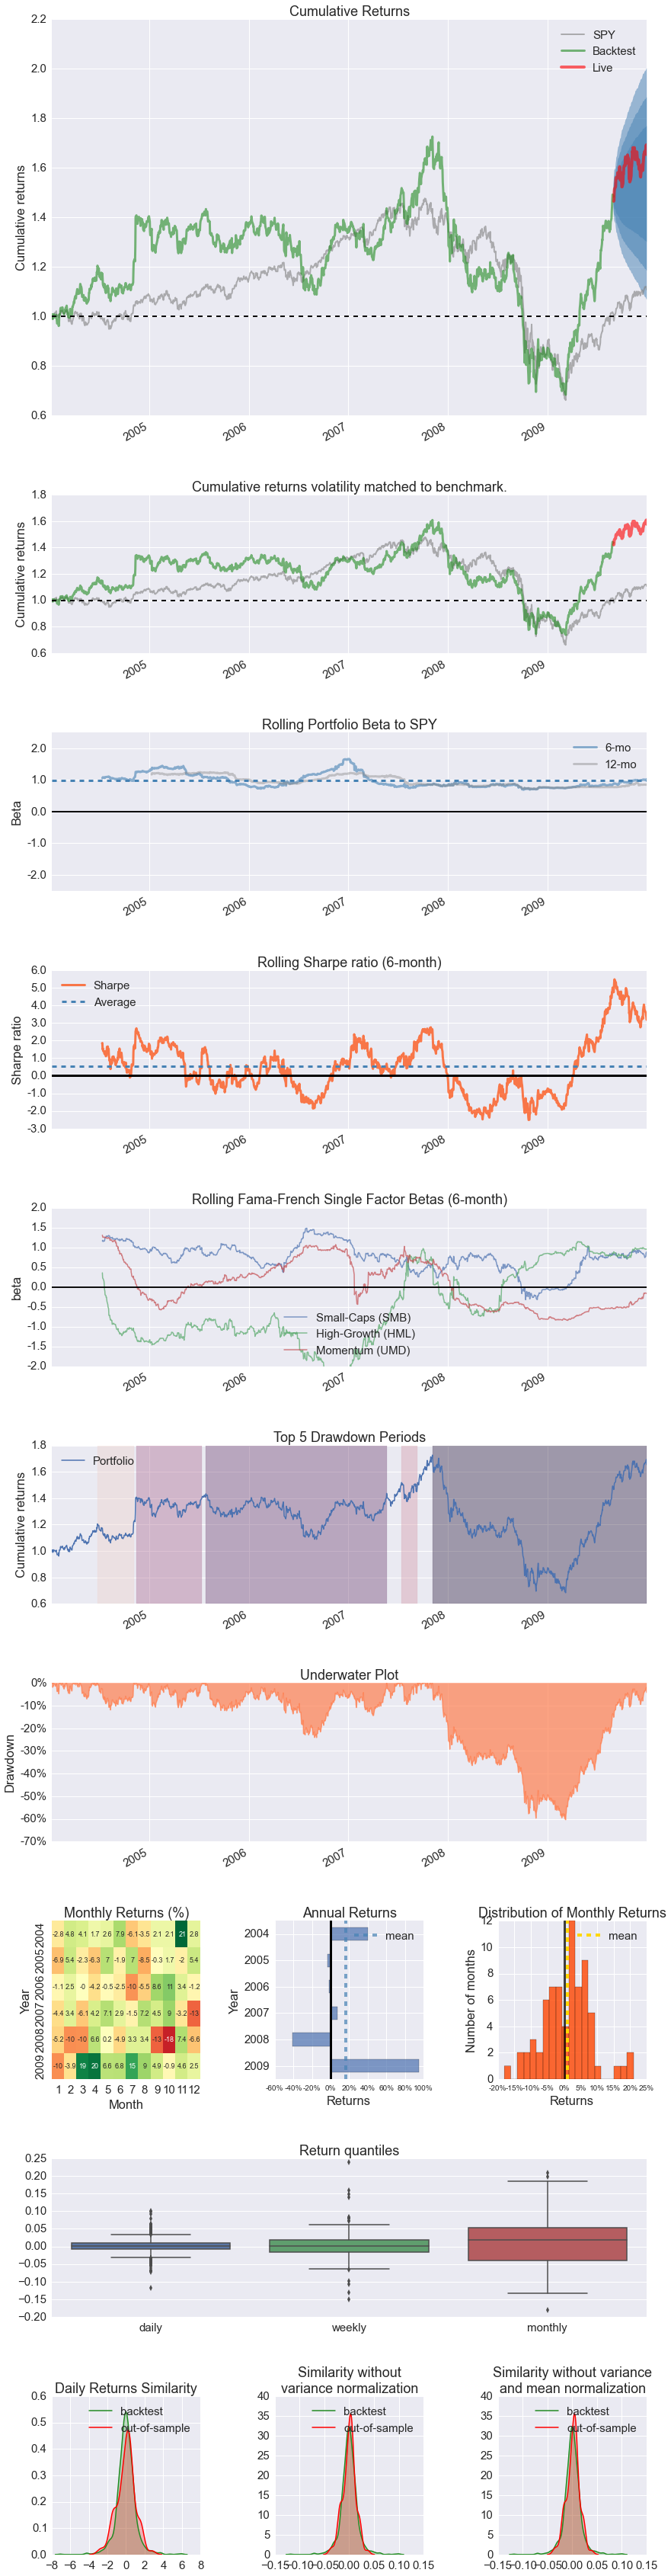


Stress Events
                             mean    min    max
Lehmann                    -0.003 -0.047  0.041
Aug07                       0.003 -0.030  0.029
Mar08                      -0.004 -0.033  0.034
Sept08                     -0.007 -0.044  0.041
2009Q1                     -0.004 -0.050  0.034
2009Q2                      0.007 -0.040  0.061
Low Volatility Bull Market  0.000 -0.061  0.064
GFC Crash                  -0.001 -0.118  0.101
Recovery                    0.004 -0.040  0.060


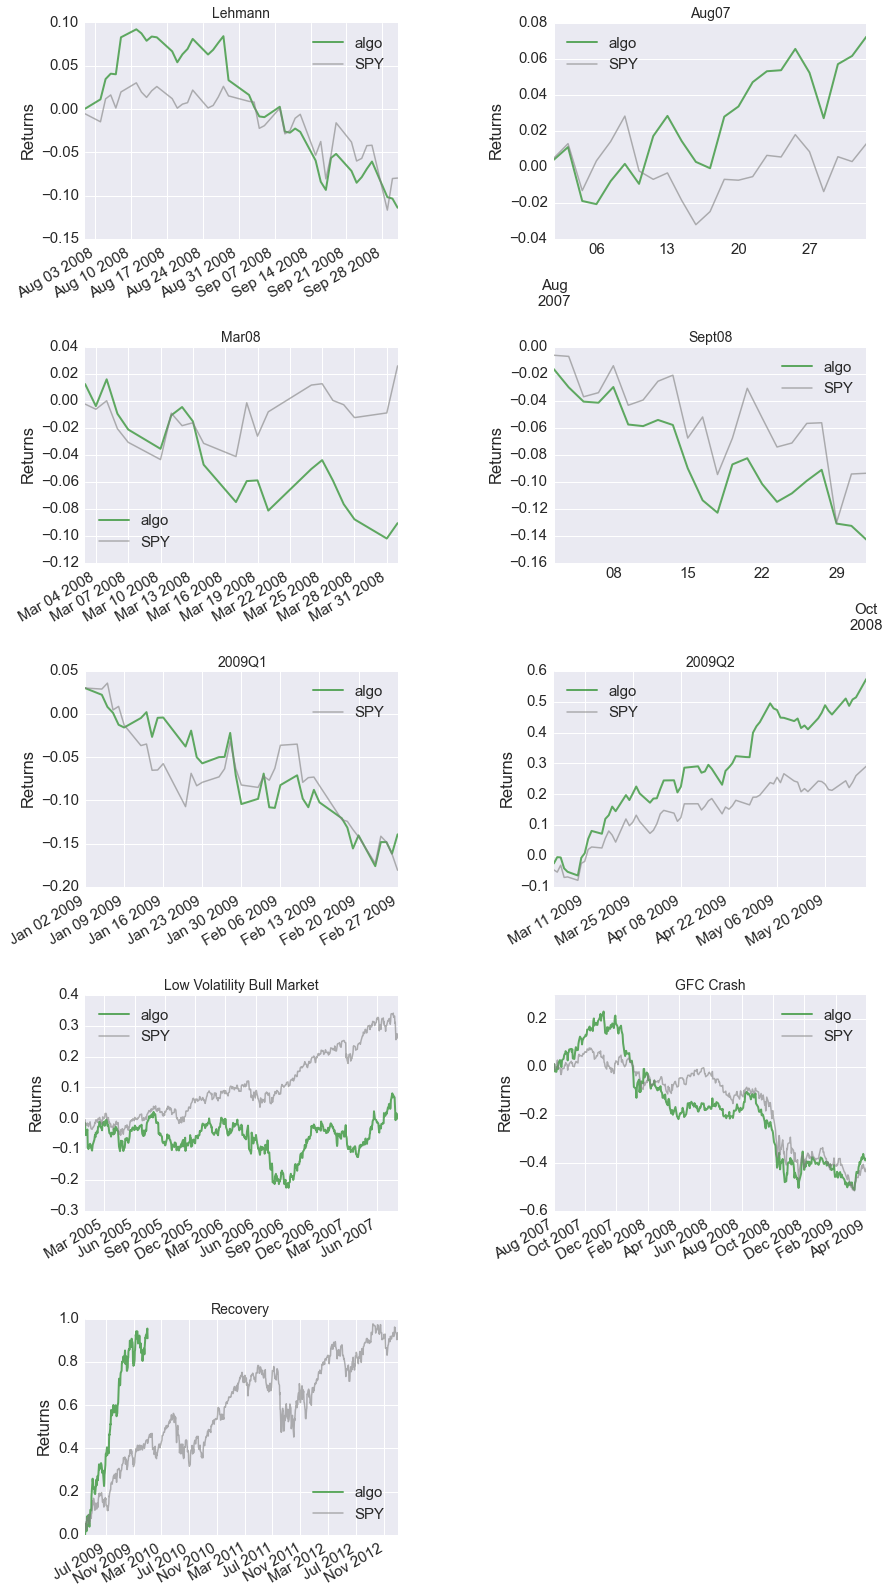



Top 10 long positions of all time (and max%)
['COST' 'DELL' 'CERN' 'MMM' 'INTC' 'AMD' 'GPS']
[ 0.9    0.857  0.835  0.821  0.786  0.758  0.622]


Top 10 short positions of all time (and max%)
['AMD' 'DELL' 'CERN' 'MMM' 'GPS' 'INTC' 'COST']
[-0.301 -0.266 -0.255 -0.226 -0.201 -0.185 -0.164]


Top 10 positions of all time (and max%)
['COST' 'DELL' 'CERN' 'MMM' 'INTC' 'AMD' 'GPS']
[ 0.9    0.857  0.835  0.821  0.786  0.758  0.622]


All positions ever held
['COST' 'DELL' 'CERN' 'MMM' 'INTC' 'AMD' 'GPS']
[ 0.9    0.857  0.835  0.821  0.786  0.758  0.622]




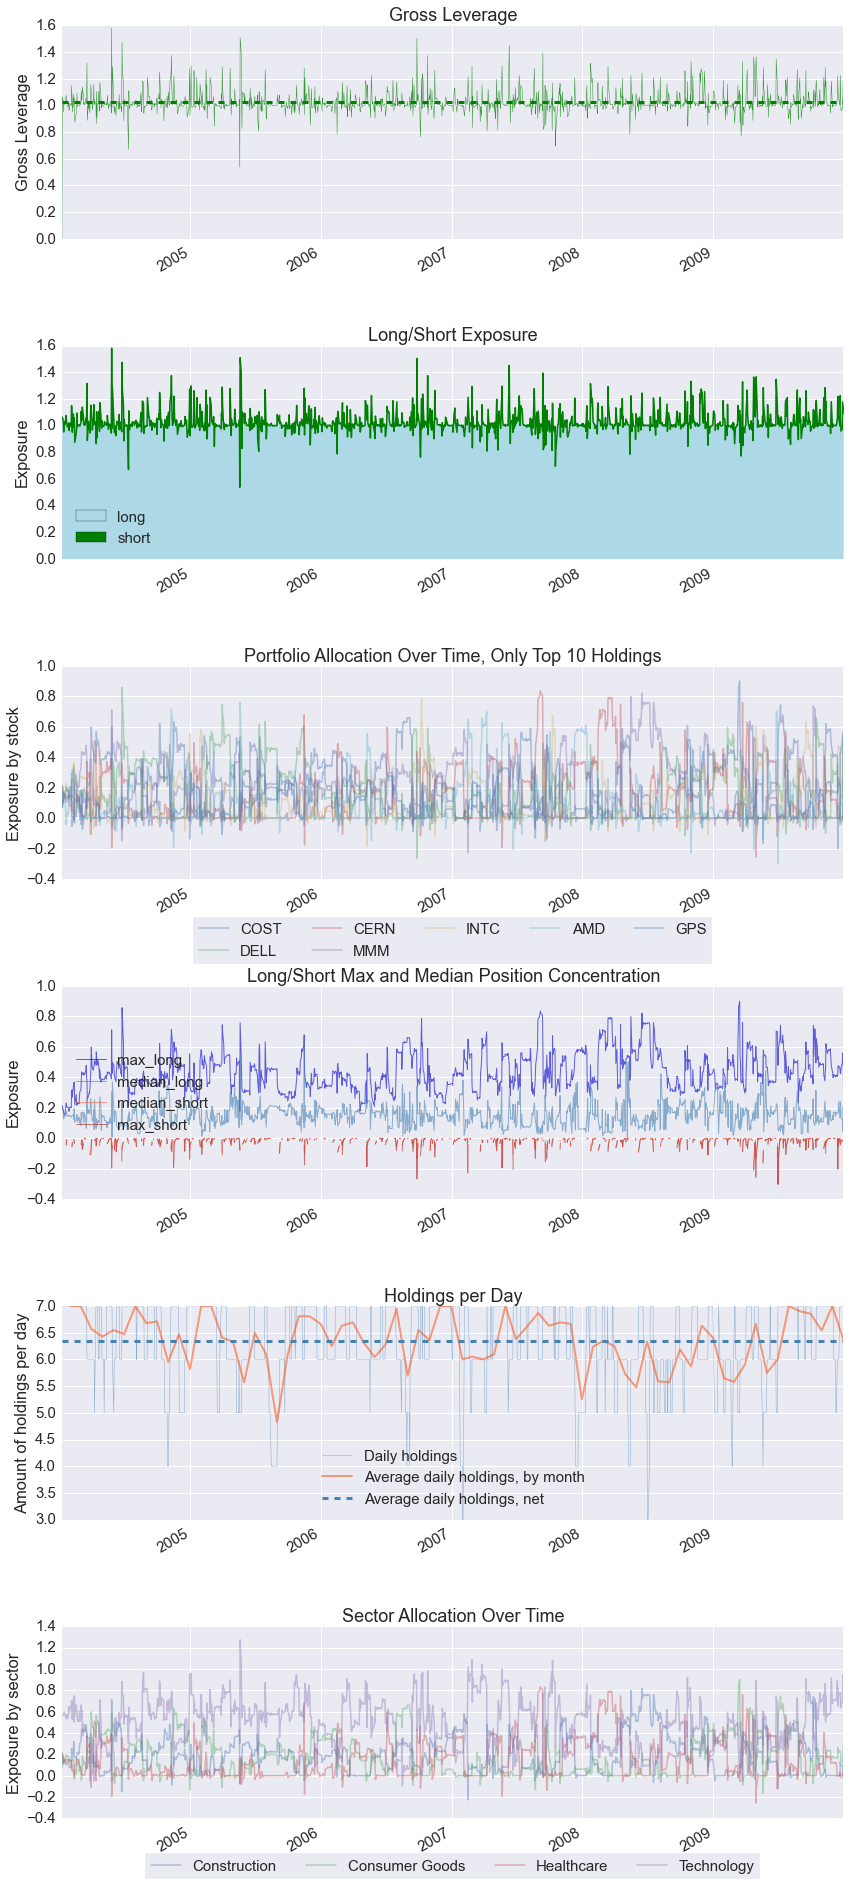

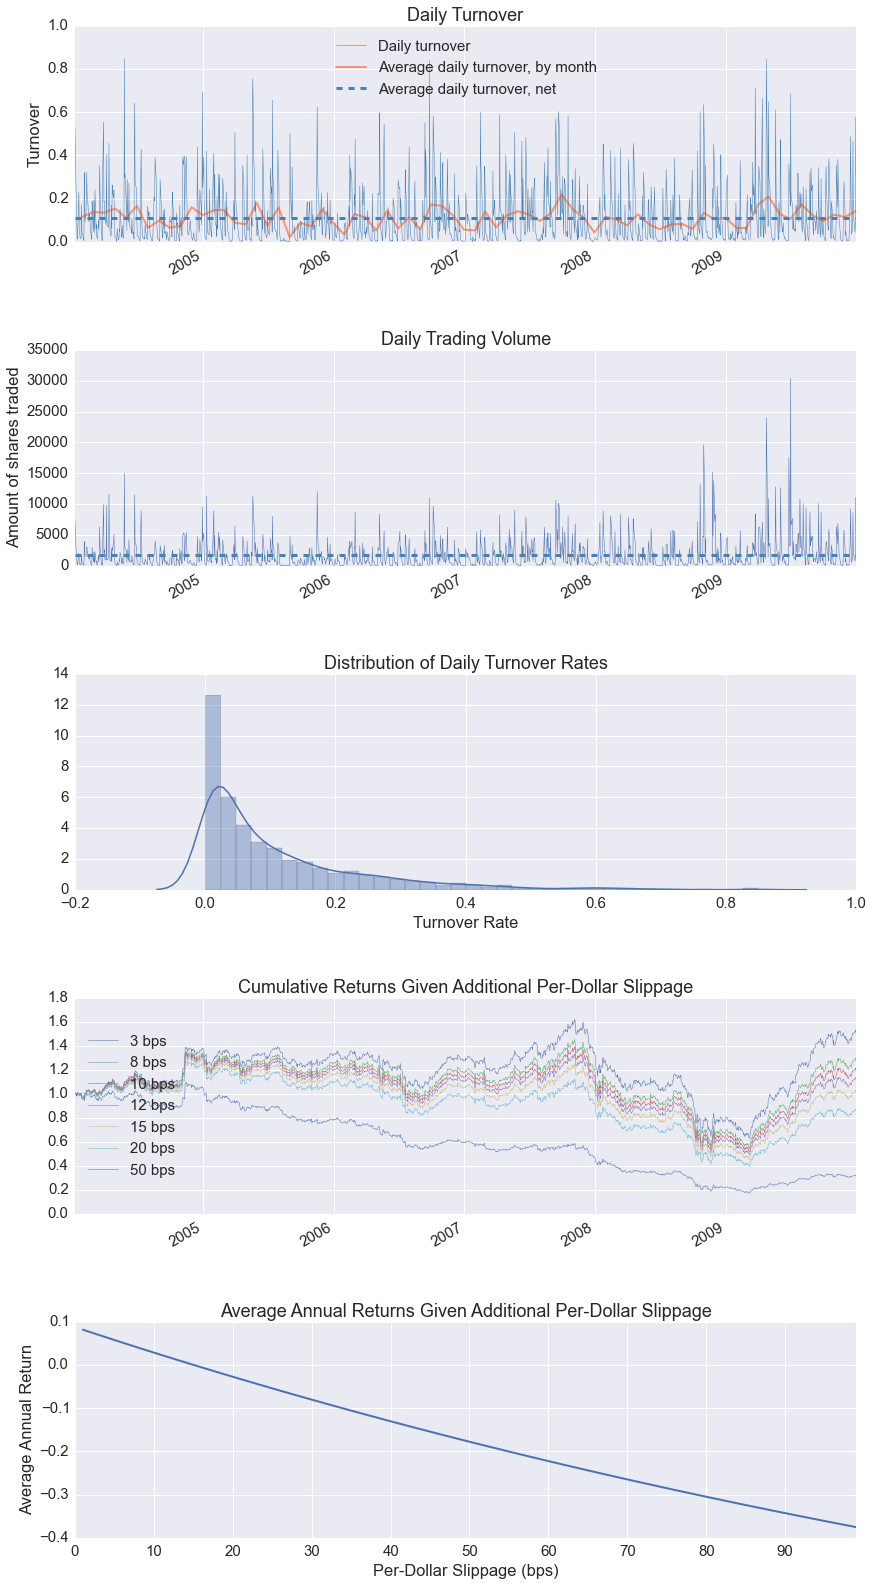

Running T model
 [-----------------100%-----------------] 2000 of 2000 complete in 3.1 sec
Finished T model (required 33.75 seconds).

Running BEST model
 [-----------------100%-----------------] 2000 of 2000 complete in 7.8 sec
Finished BEST model (required 77.04 seconds).

Finished plotting Bayesian cone (required 0.14 seconds).

Finished plotting BEST results (required 1.69 seconds).

Finished computing Bayesian predictions (required 0.25 seconds).

Finished plotting Bayesian VaRs estimate (required 0.07 seconds).

Running alpha beta model


/Users/acampbell/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


LinAlgError: 1-dimensional array given. Array must be two-dimensional

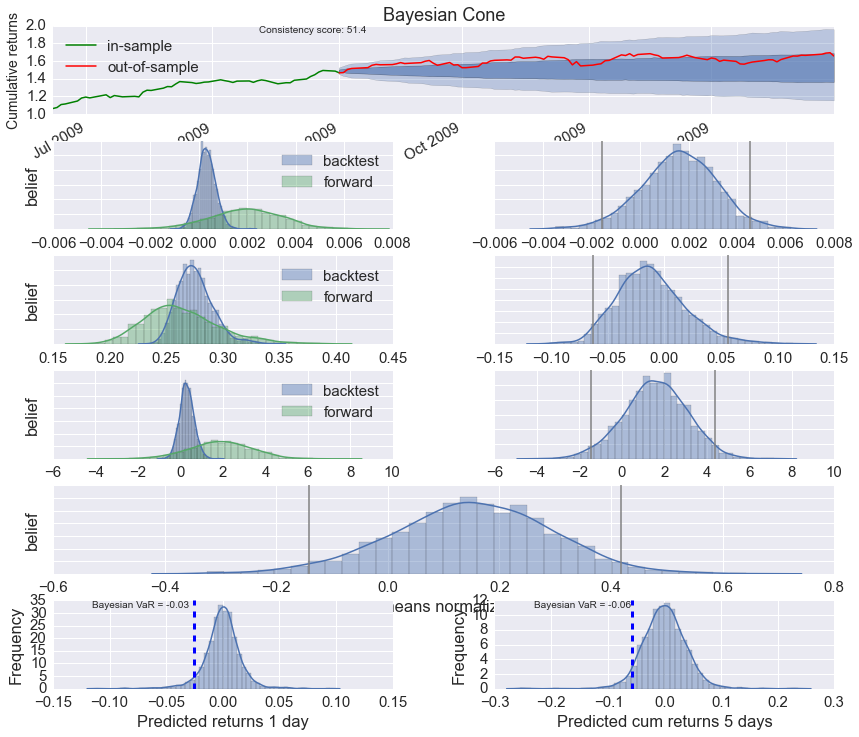

In [5]:
pf.create_full_tear_sheet(returns, positions, transactions, gross_lev=gross_lev, 
                          slippage=0, sector_mappings=sect_map, live_start_date='2009-9-1', bayesian=True)

In [8]:
reload(pf.tears)

<module 'pyfolio.tears' from '/Users/acampbell/repo/pyfolio/pyfolio/tears.py'>

Running T model
 [-----------------100%-----------------] 2000 of 2000 complete in 3.1 sec
Finished T model (required 31.72 seconds).

Running BEST model
 [-----------------100%-----------------] 2000 of 2000 complete in 5.6 sec
Finished BEST model (required 45.27 seconds).

Finished plotting Bayesian cone (required 0.13 seconds).

Finished plotting BEST results (required 0.67 seconds).

Finished computing Bayesian predictions (required 0.12 seconds).

Finished plotting Bayesian VaRs estimate (required 0.05 seconds).

Running alpha beta model
 [-----------------100%-----------------] 2000 of 2000 complete in 3.5 sec
Finished running alpha beta model (required 58.10 seconds).

Finished plotting alpha beta model (required 0.17 seconds).

Running stochastic volatility model on most recent 400 days of returns.

Finished running stochastic volatility model (required 113.55 seconds).

Plotting stochastic volatility model

Finished plotting stochastic volatility model (required 0.27 seconds).

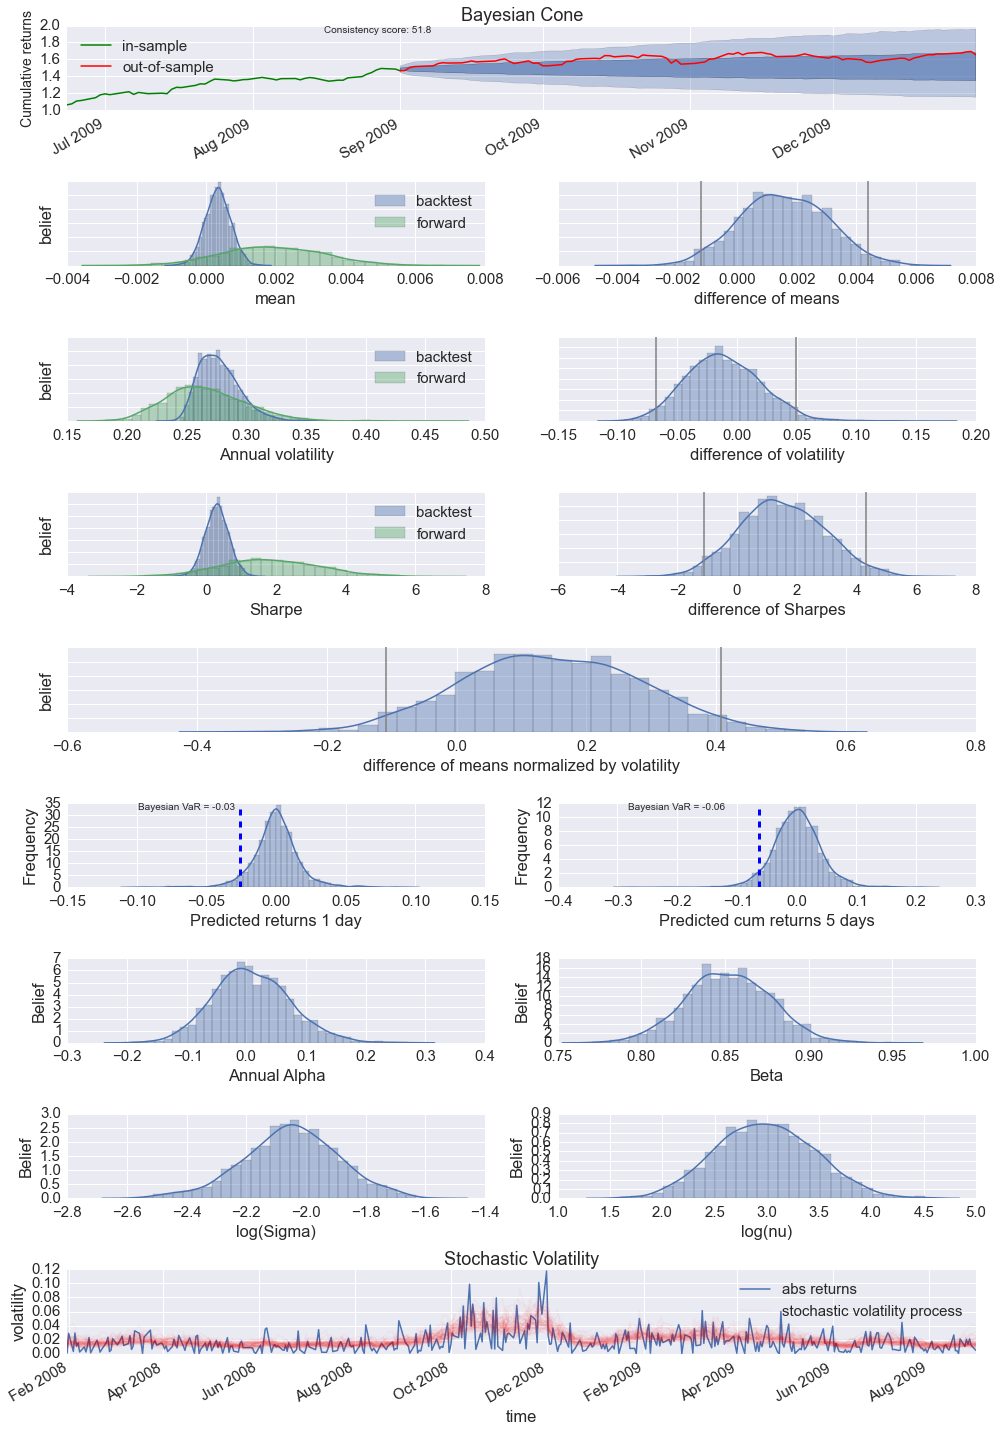

In [10]:
pf.create_bayesian_tear_sheet(returns, stoch_vol=True, live_start_date='2009-9-1')